In [59]:
# Importo las librerias a utilizar
#!pip install -U threadpoolctl 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score, davies_bouldin_score

In [60]:
# Cargo en memoria el dataset
dataset__route = "data/basic1.csv"
dataset_df = pd.read_csv(dataset__route)

# Muestro los 5 primeros ejemplos del dataset
dataset_df.head(5)

,x,y,color
0,79.408289,152.834424,0
1,98.046263,186.910700,0
2,240.578979,48.473684,1
3,109.687183,277.945769,0
4,249.626082,229.753352,1


In [61]:
# Muestro el numero de clases registradas (el modelo mas optimo deberia ser aquel cuyo numero de clusters coincidan con el numero de clases reales del dataset)
dataset_df['color'].unique()

array([0, 1, 3, 2], dtype=int64)

In [62]:
# Al ser KMeans un algoritmo basado en distancias, es muy importante estandarizar los valores registrados en el conjunto de datos
X = dataset_df.drop(columns = ['color'])

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [65]:
n_bandwidth = list(range(1,10))

dict_models = {}
list_scores = []

for bandwidth in n_bandwidth:
    best_score = -float("inf")
    best_model = None
    for _ in range(5):
        model = MeanShift(bandwidth=bandwidth, n_jobs= -1)
        model.fit(X)
        score = davies_bouldin_score(X, model.labels_)
        if score > best_score:
            best_score = score
            best_model = model
    list_scores.append(best_score)
    dict_models["model_bandwidth{}".format(bandwidth)] = best_model

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
# Represento el metodo del codo en un grafico 2D
plt.figure()
plt.plot(n_bandwidth, list_scores, marker = 'x')

plt.title("Variacion de coeficiente Davies Bouldin con n Bandwidth")
plt.xlabel("Valor de bandwidth para cada modelo")
plt.ylabel("Coeficiente Davies Bouldin")
plt.xticks(range(1, 10, 1))
plt.show()

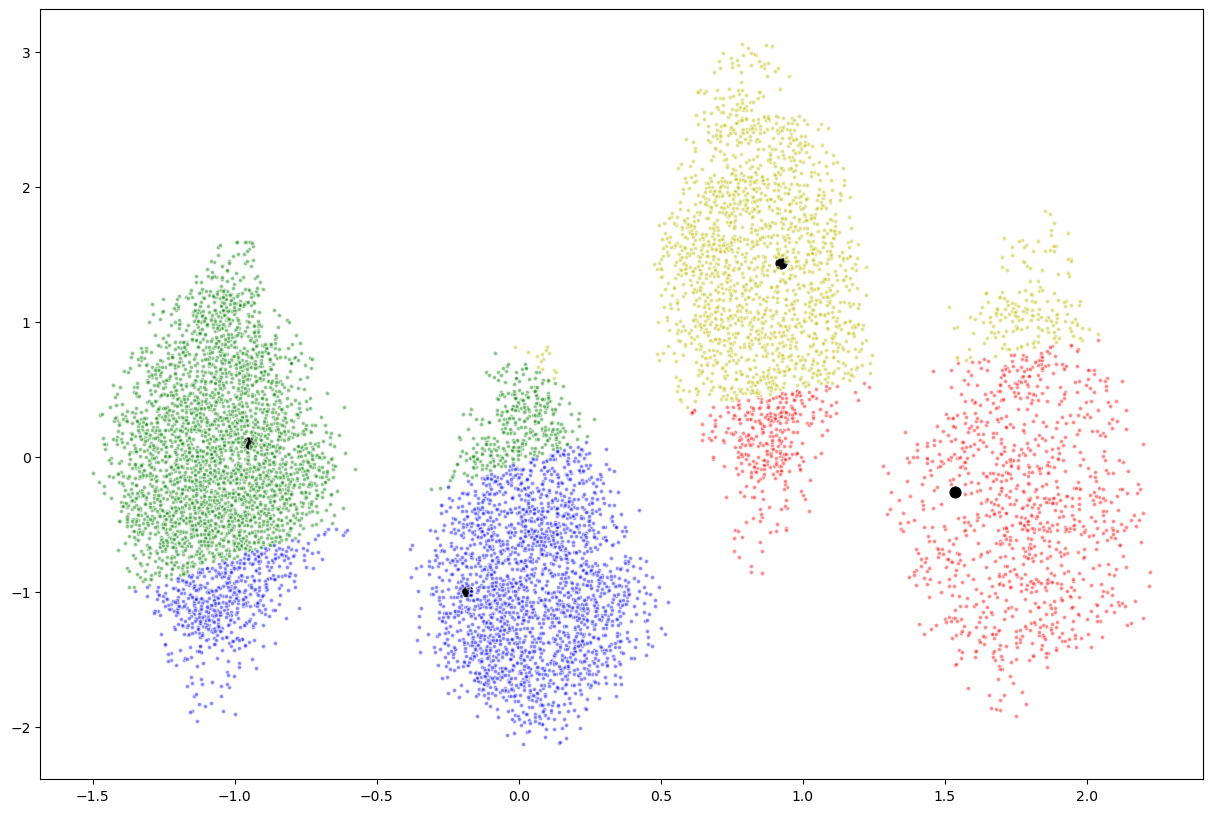

In [58]:
# Obtengo el modelo con 3 clusteres
modelo_3clusters = dict_modelos["clusters__4"]

# Obtengo las agrupaciones del modelo para el conjunto de datos
labels = modelo_3clusters.labels_

# Obtengo los centroides de cada grupo
centroids = modelo_3clusters.cluster_centers_
centroids



x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
n_clusters = 4

# Represento un grafico de dispersion con los ejemplos agrupados por el modelo
plt.figure(figsize = (15, 10))
for i, color in zip(range(n_clusters), ['r', 'g', 'b', 'y']):   # Segundo parametro de zip() es una lista de colores
    idx = np.where(labels == i)
    plt.plot(X[idx, 0], X[idx, 1], 'w', markerfacecolor=color, marker='.', alpha = 0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], color = 'k', s = 60)
plt.show()